<a href="https://colab.research.google.com/github/Joao-Quinta/master_2eme_1er/blob/main/Copy_of_Classwork_DataScienceCourse_Seminar_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello world!")

Hello world!


In [ ]:
import numpy as np

Numpy is a library which you will use a lot during your Python practice.

In [ ]:
a=np.array(range(2,8,3))
a

array([2, 5])

In [ ]:
a.shape

(2,)

In [ ]:
a=a.reshape(-1,1)
a

array([[2],
       [5]])

In [ ]:
a.shape

(2, 1)

In [ ]:
a.T

array([[2, 5]])

In [ ]:
a.T.shape

(1, 2)

In [ ]:
a.T*a

array([[ 4, 10],
       [10, 25]])

In [ ]:
a.T @ a

array([[29]])

**Vectors using numpy**

Create vectors of a given shape (5,1) using [np.ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html), [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) and [np.random.rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)


In [ ]:
shape = (5,1)

In [ ]:
#ones
vectors = np.ones(5)
vectors

array([1., 1., 1., 1., 1.])

In [ ]:
#zeros
vectors = np.zeros(5)
vectors

array([0., 0., 0., 0., 0.])

In [ ]:
#random
vectors = np.random.rand(5,1)
vectors

array([[0.31721135],
       [0.07801229],
       [0.68311116],
       [0.48046237],
       [0.45985746]])

**Represantation space with data vectors** (slides 8-9)

The D-dimensional space is divided into equivalent bins.
Show that the probability to have a not empty bin decreases while dimentionality rises. 

In [ ]:
b = 10 #bins
n = 5 #samples per bim we want
D = 3 #representation space dimensionality

# To find out L, refer to the lectures
L = n*(b**D)#vectors we need to genenrate to have n sampels per bin
L

5000

In [ ]:
shape=(L, D)

Generate X as random matrix of a given shape

In [ ]:
X = np.random.rand(n*b**D,D)
X[:6]

array([[0.5337728 , 0.58153524, 0.13719428],
       [0.72073967, 0.17459806, 0.24241704],
       [0.15037296, 0.10249486, 0.63935576],
       [0.36653589, 0.38350938, 0.16190835],
       [0.58741259, 0.29464072, 0.1825737 ],
       [0.21281243, 0.77891588, 0.54406708]])

In [ ]:
X.shape

(5000, 3)

Using [np.histogramdd](https://numpy.org/doc/stable/reference/generated/numpy.histogramdd.html) make a D-dimensional histogram for bins=b. It should return an array of size (b, b, ..., b) where each element is equal to number of samples in the bin.

In [ ]:
h, _ = np.histogramdd(X)

In [ ]:
assert h.shape == (10, 10, 10)

In [ ]:
h[0]

array([[ 7.,  3.,  4.,  2.,  8.,  4.,  8.,  5.,  3.,  4.],
       [ 9.,  6.,  3.,  3.,  5.,  4.,  3.,  3.,  0.,  2.],
       [ 4.,  6.,  6.,  2.,  5.,  4.,  3.,  3.,  6.,  4.],
       [ 2.,  4.,  3.,  3.,  2., 10.,  5.,  9.,  9.,  4.],
       [ 5.,  6.,  5.,  4.,  4.,  8.,  7.,  1.,  1.,  9.],
       [ 6.,  4., 10.,  7.,  2.,  5.,  5., 10.,  1.,  5.],
       [ 3.,  4.,  7.,  5.,  6.,  8.,  5.,  3.,  8.,  8.],
       [ 6.,  6.,  4.,  3.,  6.,  5.,  4.,  5.,  6.,  5.],
       [ 4.,  6.,  3.,  4.,  6.,  4., 13.,  6.,  8.,  5.],
       [ 6.,  5.,  2.,  2.,  4.,  8.,  2.,  8.,  5.,  5.]])

In [ ]:
D_range = range(1,8)
h_values = []
N = L
for D in D_range:
  shape=(N, D)
  X = np.random.rand(N,D)
  h, _ = np.histogramdd(X)
  h_mean = np.mean(h)
  p = h_mean/N
  h_values.append(h_mean)

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Average sample in the bin')

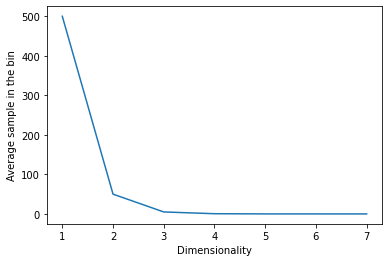

In [ ]:
plt.plot(D_range, h_values)
plt.xlabel("Dimensionality")
plt.ylabel("Average sample in the bin")

**Hypersphere and hypercube** (slides 10-11)

Hypercube [-r, r] in D dimensional space. We draw N points uniformly from it. Show how many points will fall in the hypersphere which center is in the origin and radius is r.

Generate N uniform samples from hypercube [-r,r] in D-dimensional space using [np.random.uniform ](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html)

In [ ]:
N = 100
D = 3
r = 0.3

In [ ]:
cube_samples = np.random.uniform(-r,r,N)

Check yourself that samples are within given range

In [ ]:
assert np.all(cube_samples >= -r) and np.all(cube_samples <= r)

What does this line do?

Now how can you verify that a point lies in the sphere with a center in (0, 0) and radius r=0.5? 

*Hint: use [np.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)*

In [ ]:
point=np.random.rand(2,)
r=0.5
point

array([0.36350694, 0.0713214 ])

In [ ]:
np.linalg.norm(point)

0.3704376324556491

In [ ]:
#check if the point lies in the sphere with a center in (0, 0) and radius r=0.5? 
res = (np.linalg.norm(point) >= -r) and (np.linalg.norm(point) <= r)
res

True

What if we have N=100 points so the array of shape (100,2)? In this case we want to have an answer for each point separately.

*Hint: check the axis argument in the function you used for one point.*

In [ ]:
points=np.random.rand(100,2)
points[:5]

array([[0.69958858, 0.41972366],
       [0.67694257, 0.73511219],
       [0.69835024, 0.79544232],
       [0.34287926, 0.23344024],
       [0.85615926, 0.49217609]])

In [ ]:
res = np.array([(np.linalg.norm(points[i,:]) >= -r) and (np.linalg.norm(points[i,:]) <= r) for i in range(points.shape[0])])
res

array([False, False, False,  True, False, False,  True, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True, False,  True,
       False])

How many points are in the sphere?

Hint: use [np.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)

In [ ]:
#how many points are in the sphere?
res = np.sum(res)
res

28

Now let us check the simulation presented in the course: how many sampels from the cube will fall in the hypersphere? The cube [-r,r] and the sphere with hte center in O and radius r, both in D dimensional space. Vary D from 1 to 20 and plot the number of samples in the sphere along y axis and dimension along x axis. r=0.3

In [ ]:
r = 0.3
N = 1000
D_range=range(1,20)
samples_in_sphere_list = []
for D in D_range:
  cube_samples = np.random.uniform(-r,r,N)
  points=np.random.rand(N,D)
  samples_in_sphere = np.sum(np.array([(np.linalg.norm(points[i,:]) >= -r) and (np.linalg.norm(points[i,:]) <= r) for i in range(points.shape[0])]))
  samples_in_sphere_list.append(samples_in_sphere)

Text(0, 0.5, 'Samples in the sphere')

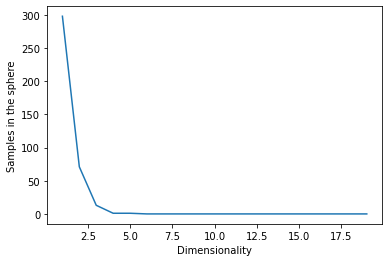

In [ ]:
plt.plot(D_range,samples_in_sphere_list)
plt.xlabel("Dimensionality")
plt.ylabel("Samples in the sphere")

**Concentration of angles** (slides 20-22)

Draw vectors from a D-dimensional space, what is their expected angle?

In [ ]:
def generate_points(D):
  X = np.random.rand(D,)
  Y = np.random.rand(D,)
  Z = np.random.rand(D,)
  W = np.random.rand(D,)
  return X, Y, Z, W

def compute_cos(a, b):
  cos = np.cos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)))
  return cos



First, verify how cos of the angle between two random vectors. For defining two vectors we sample 4 random points.

$$a = X - Y$$
$$b = W - Z$$

In [ ]:
N = 100
means_cos = []
D_range=range(5,1000)
for D in D_range:
  sum_cos = 0
  for _ in range(N):
    X, Y, Z, W = generate_points(D)
    cos = compute_cos(np.subtract(X,Y), np.subtract(W,Z))
    sum_cos += cos
  mean_cos = sum_cos/N
  means_cos.append(mean_cos)

Text(0, 0.5, 'cos')

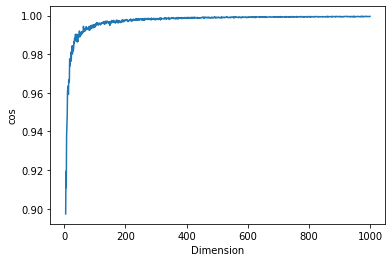

In [ ]:
plt.plot(D_range, means_cos)
plt.xlabel("Dimension")
plt.ylabel("cos")

Now, verify the angle between vectors which form a triangle.

*   List item
*   List item



In [ ]:
N = 100
means_cos = []
D_range=range(5,1000)
for D in D_range:
  sum_cos = 0
  for _ in range(N):
    X, Y, Z, _ = generate_points(D)
    cos = np.cos(np.subtract(np.dot(Y,Y),np.dot(X,Y))/np.subtract(2*np.dot(Y,Y), 2*np.dot(X,Y)))
    sum_cos += cos
  mean_cos = sum_cos/N
  means_cos.append(mean_cos)

Text(0, 0.5, 'cos')

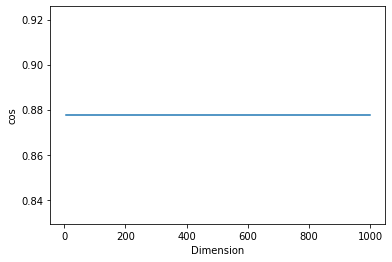

In [ ]:
plt.plot(D_range, means_cos)
plt.xlabel("Dimension")
plt.ylabel("cos")